## Part 1: Pulse Rate Algorithm

### Contents
Fill out this notebook as part of your final project submission.

**You will have to complete both the Code and Project Write-up sections.**
- The [Code](#Code) is where you will write a **pulse rate algorithm** and already includes the starter code.
   - Imports - These are the imports needed for Part 1 of the final project. 
     - [glob](https://docs.python.org/3/library/glob.html)
     - [numpy](https://numpy.org/)
     - [scipy](https://www.scipy.org/)
- The [Project Write-up](#Project-Write-up) to describe why you wrote the algorithm for the specific case.


### Dataset
You will be using the **Troika**[1] dataset to build your algorithm. Find the dataset under `datasets/troika/training_data`. The `README` in that folder will tell you how to interpret the data. The starter code contains a function to help load these files.

1. Zhilin Zhang, Zhouyue Pi, Benyuan Liu, ‘‘TROIKA: A General Framework for Heart Rate Monitoring Using Wrist-Type Photoplethysmographic Signals During Intensive Physical Exercise,’’IEEE Trans. on Biomedical Engineering, vol. 62, no. 2, pp. 522-531, February 2015. Link

-----

### Code

In [1]:
import glob

import numpy as np
import scipy as sp
import scipy.io
from scipy import io, signal
from matplotlib import pyplot as plt

def LoadTroikaDataset():
    """
    Retrieve the .mat filenames for the troika dataset.

    Review the README in ./datasets/troika/ to understand the organization of the .mat files.

    Returns:
        data_fls: Names of the .mat files that contain signal data
        ref_fls: Names of the .mat files that contain reference data
        <data_fls> and <ref_fls> are ordered correspondingly, so that ref_fls[5] is the 
            reference data for data_fls[5], etc...
    """
    data_dir = "./datasets/troika/training_data"
    data_fls = sorted(glob.glob(data_dir + "/DATA_*.mat"))
    ref_fls = sorted(glob.glob(data_dir + "/REF_*.mat"))
    return data_fls, ref_fls

def LoadTroikaDataFile(data_fl):
    """
    Loads and extracts signals from a troika data file.

    Usage:
        data_fls, ref_fls = LoadTroikaDataset()
        ppg, accx, accy, accz = LoadTroikaDataFile(data_fls[0])

    Args:
        data_fl: (str) filepath to a troika .mat file.

    Returns:
        numpy arrays for ppg, accx, accy, accz signals.
    """
    data = sp.io.loadmat(data_fl)['sig']
    data
    return data[2:]

def AggregateErrorMetric(pr_errors, confidence_est):
    """
    Computes an aggregate error metric based on confidence estimates.

    Computes the MAE at 90% availability. 

    Args:
        pr_errors: a numpy array of errors between pulse rate estimates and corresponding 
            reference heart rates.
        confidence_est: a numpy array of confidence estimates for each pulse rate
            error.

    Returns:
        the MAE at 90% availability
    """
    # Higher confidence means a better estimate. The best 90% of the estimates
    #    are above the 10th percentile confidence.
    percentile90_confidence = np.percentile(confidence_est, 10)

    # Find the errors of the best pulse rate estimates
    best_estim0tes = pr_errors[confidence_est >= percentile90_confidence]

    # Return the mean absolute error
    return np.mean(np.abs(best_estimates))

def Evaluate():
    """
    Top-level function evaluation function.

    Runs the pulse rate algorithm on the Troika dataset and returns an aggregate error metric.

    Returns:
        Pulse rate error on the Troika dataset. See AggregateErrorMetric.
    """
    # Retrieve dataset files
    data_fls, ref_fls = LoadTroikaDataset()
    errs, confs = [], []
    for data_fl, ref_fl in zip(data_fls, ref_fls):
        # Run the pulse rate algorithm on each trial in the dataset
        errors, confidence = RunPulseRateAlgorithm(data_fl, ref_fl)
        errs.append(errors)
        confs.append(confidence)
        # Compute aggregate error metric
    errs = np.hstack(errs)
    confs = np.hstack(confs)
    return AggregateErrorMetric(errs, confs)

def RunPulseRateAlgorithm(data_fl, ref_fl):
    # Load data using LoadTroikaDataFile
    ppg, accx, accy, accz = LoadTroikaDataFile(data_fl)
    
    # Compute pulse rate estimates and estimation confidence.

    # Return per-estimate mean absolute error and confidence as a 2-tuple of numpy arrays.
    errors, confidence = np.ones(100), np.ones(100)  # Dummy placeholders. Remove
    return errors, confidence

In [2]:
def LowpassFilter(signal, passband):
  b, a = sp.signal.butter(3, passband, btype='bandpass', fs=125)
  return sp.signal.filtfilt(b, a, signal)

In [3]:
fs = 125 # The data set documentation says all signals were sampled at 125 HZ

#Evaluate()

In [80]:
fs = 125 # The data set documentation says all signals were sampled at 125 HZ
data_fls, ref_fls = LoadTroikaDataset()
errs, confs = [], []
data_fl = data_fls[8]
ref_fl = ref_fls[8]

In [81]:
#ref = LoadTroikaDataFile(ref_fl)
#ref

[  -2.5   -3.5   -2.5 ...,  190.   199.5  205. ]
40803
6.08957674681


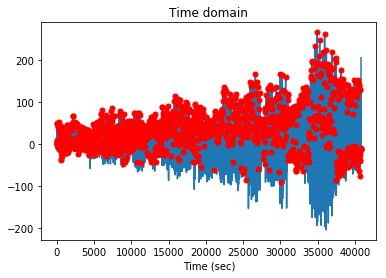

In [82]:
ppg, accx, accy, accz = LoadTroikaDataFile(data_fl)
print(ppg)
print(len(ppg))
ts = np.arange(0, len(ppg)/fs, 1/fs)
print(np.mean(ppg))
pks=sp.signal.find_peaks(ppg)[0]
        
plt.clf()
plt.figure(0)
plt.title('Time domain')
plt.plot(ppg)
plt.xlabel('Time (sec)')

plt.plot(pks, ppg[pks],"r.",ms=10)                        

In [83]:
60/(np.diff(pks)/fs)

array([  250.        ,  1875.        ,   241.93548387, ...,  2500.        ,
        3750.        ,  1500.        ])

In [84]:
mean_pulse_rate = np.mean(60/(np.diff(pks)/fs))
print ("mean pulse rate from time domain =", mean_pulse_rate)

mean pulse rate from time domain = 1214.04373073


In [85]:
pks=sp.signal.find_peaks(ppg, height=15, distance=35)[0]

In [86]:
60/(np.diff(pks)/fs)

array([  61.47540984,   63.55932203,   72.11538462,   83.33333333,
         80.64516129,   75.        ,   73.52941176,   76.53061224,
         74.25742574,   72.11538462,   80.64516129,   70.09345794,
         87.20930233,  214.28571429,  156.25      ,   86.20689655,
         85.22727273,   82.41758242,   88.23529412,   82.41758242,
         84.26966292,   80.64516129,   91.46341463,   88.23529412,
         91.46341463,   86.20689655,   89.28571429,   88.23529412,
         83.33333333,   79.78723404,   82.41758242,   75.75757576,
         74.25742574,   75.        ,   76.53061224,   73.52941176,
         83.33333333,   66.96428571,   78.125     ,   83.33333333,
         79.78723404,   88.23529412,   86.20689655,   81.52173913,
         87.20930233,   89.28571429,   41.43646409,   45.18072289,
         86.20689655,  141.50943396,  136.36363636,  153.06122449,
        141.50943396,  150.        ,  153.06122449,  147.05882353,
        159.57446809,  147.05882353,   74.25742574,  166.66666

In [87]:
mean_pulse_rate = np.mean(60/(np.diff(pks)/fs))
print ("mean pulse rate from time domain =", mean_pulse_rate)

mean pulse rate from time domain = 139.628774205


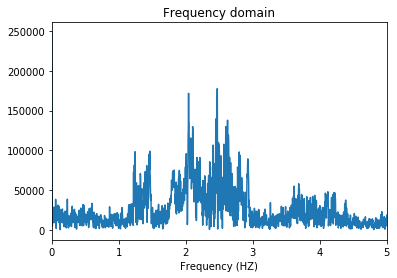

In [88]:
freqs = np.fft.rfftfreq(len(ppg), 1/fs)
fft_mag = np.abs(np.fft.rfft(ppg))
plt.figure(1)
plt.title('Frequency domain')
plt.xlabel('Frequency (HZ)')
plt.xlim (0,5)
plt.plot(freqs, fft_mag)

In [89]:
freqs

array([  0.00000000e+00,   3.06350023e-03,   6.12700047e-03, ...,
         6.24923412e+01,   6.24954047e+01,   6.24984682e+01])

In [90]:
plt.figure(2)
bandpassed_ppg = LowpassFilter(ppg, (0.67, 4)) # Corresponding to 40 HZ to 240 HZ band 

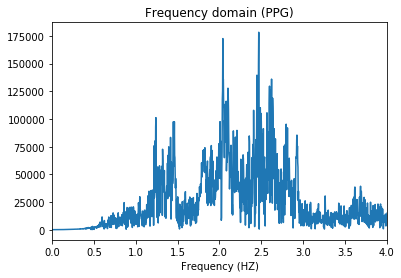

In [91]:
freqs_ppg = np.fft.rfftfreq(len(bandpassed_ppg), 1/fs)
fft_ppg = np.abs(np.fft.rfft(bandpassed_ppg))
plt.figure(1)
plt.title('Frequency domain (PPG)')
plt.xlabel('Frequency (HZ)')
plt.xlim (0, 4)
plt.plot(freqs_ppg, fft_ppg)

In [92]:
np.argmax(freqs_ppg)

20401

In [93]:
freqs_ppg

array([  0.00000000e+00,   3.06350023e-03,   6.12700047e-03, ...,
         6.24923412e+01,   6.24954047e+01,   6.24984682e+01])

In [94]:
freqs_ppg[np.where(fft_ppg == np.amax(fft_ppg))][0]

2.4691811876577701

In [95]:
freqs.shape

(20402,)

In [96]:
fft_ppg.shape

(20402,)

Text(0.5,1,'Bandpass filtered PPG signal')

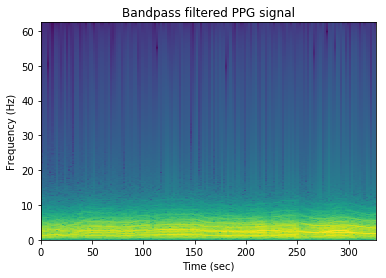

In [97]:
# Splits of 2-second windows since ground truth slides every 2 seconds, so NFFT=fs*8, fs being 125 HZ in our case
spec_ppg, freqs_ppg, _ , _ = plt.specgram(bandpassed_ppg, Fs=fs, NFFT=fs*8, 
                                              noverlap = 6*fs, xextent = [0, len(bandpassed_ppg)/fs]);
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title("Bandpass filtered PPG signal")

In [98]:
spec_ppg.shape

(501, 160)

In [99]:
len(freqs_ppg)

501

In [100]:
spec_ppg

array([[  4.62890354e-04,   8.20213147e-05,   5.26916181e-05, ...,
          1.75360536e-04,   2.29689531e-04,   1.65821906e-02],
       [  1.38247887e-03,   2.18873464e-04,   1.03256336e-04, ...,
          3.64160512e-04,   3.36283533e-04,   4.71716197e-02],
       [  1.99295316e-03,   2.56113261e-03,   6.44376496e-04, ...,
          1.40827757e-02,   3.21284207e-03,   1.04444099e-01],
       ..., 
       [  6.90502078e-17,   4.76605805e-16,   2.82648643e-16, ...,
          8.71481118e-16,   5.39634938e-15,   6.39477045e-17],
       [  6.82566006e-17,   4.73906462e-16,   2.79211904e-16, ...,
          8.71434574e-16,   5.36571511e-15,   3.20822813e-17],
       [  3.39960590e-17,   2.36503400e-16,   1.39033228e-16, ...,
          4.35709466e-16,   2.67775272e-15,   1.07308486e-17]])

In [101]:
dominant_peaks = freqs_ppg[np.argmax(spec_ppg, axis=0)]
print ("Dominant Frequency", dominant_peaks)

Dominant Frequency [ 1.25   1.25   1.25   1.375  1.375  1.375  1.375  1.5    1.375  1.375
  1.25   1.25   1.25   1.375  1.375  1.375  1.5    2.5    2.5    2.625
  2.625  1.875  2.     2.     2.     2.     2.     2.     2.     2.     2.
  2.     2.625  2.625  2.5    2.5    2.5    2.5    1.875  1.875  1.875
  1.875  1.875  1.875  2.625  2.625  2.75   2.75   2.75   2.75   2.75   2.75
  2.75   2.75   1.375  2.875  2.875  2.875  2.875  2.875  2.875  1.5    1.5
  1.5    1.5    2.875  1.5    1.5    1.5    1.375  1.5    3.     2.875
  2.875  2.875  2.875  2.75   2.75   2.625  2.5    2.5    2.5    2.5    2.5
  2.5    2.5    2.5    2.375  2.375  1.25   2.375  2.375  2.5    2.5    2.375
  2.5    2.375  2.5    2.5    2.5    2.5    2.5    2.5    2.625  2.625
  2.625  2.625  2.625  2.625  2.625  2.625  2.625  2.75   2.75   2.75
  2.875  2.875  2.75   2.875  2.875  1.375  1.375  2.5    2.375  2.375
  2.25   2.25   2.25   2.125  2.125  2.125  2.     2.125  2.     2.125
  2.125  2.375  2.375  2.5    2.

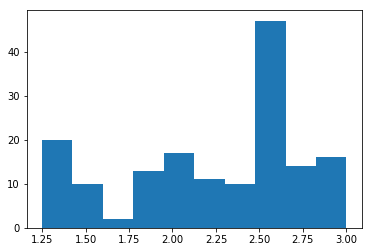

In [102]:
# Histogram of the dominant peaks
a, b, _ = plt.hist(dominant_peaks)

In [103]:
a

array([ 20.,  10.,   2.,  13.,  17.,  11.,  10.,  47.,  14.,  16.])

In [104]:
result = np.where(a == np.amax(a))
a[result[0]][0]

47.0

In [105]:
a.sort()
a

array([  2.,  10.,  10.,  11.,  13.,  14.,  16.,  17.,  20.,  47.])

In [106]:
for i in range(int(np.trunc(len(a)/3))):
    print (a[i*3:i*3+3])

[  2.  10.  10.]
[ 11.  13.  14.]
[ 16.  17.  20.]


In [107]:
int(np.trunc(len(fft_ppg)/(fs*2)))-1

80

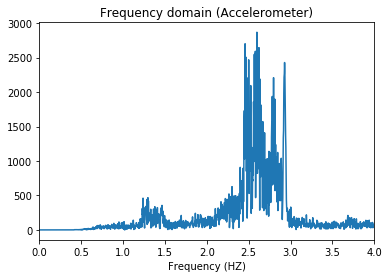

In [108]:
acc_mag = np.sqrt(np.sum(np.square(np.vstack((accx, accy, accz))), axis=0))
# Corresponding to 40 HZ to 240 HZ band 
acc_mag = LowpassFilter(acc_mag, (0.67, 4)) 

# Transform signal into frequency domain
freqs = np.fft.rfftfreq(len(acc_mag), 1/fs)
fft_mag = np.abs(np.fft.rfft(acc_mag))
plt.figure(1)
plt.title('Frequency domain (Accelerometer)')
plt.xlabel('Frequency (HZ)')
plt.xlim (0, 4)
plt.plot(freqs, fft_mag)

In [109]:
freqs

array([  0.00000000e+00,   3.06350023e-03,   6.12700047e-03, ...,
         6.24923412e+01,   6.24954047e+01,   6.24984682e+01])

0
Signal Freq [  0.      0.125   0.25    0.375   0.5     0.625   0.75    0.875   1.
   1.125   1.25    1.375   1.5     1.625   1.75    1.875   2.      2.125
   2.25    2.375   2.5     2.625   2.75    2.875   3.      3.125   3.25
   3.375   3.5     3.625   3.75    3.875   4.      4.125   4.25    4.375
   4.5     4.625   4.75    4.875   5.      5.125   5.25    5.375   5.5
   5.625   5.75    5.875   6.      6.125   6.25    6.375   6.5     6.625
   6.75    6.875   7.      7.125   7.25    7.375   7.5     7.625   7.75
   7.875   8.      8.125   8.25    8.375   8.5     8.625   8.75    8.875
   9.      9.125   9.25    9.375   9.5     9.625   9.75    9.875  10.
  10.125  10.25   10.375  10.5    10.625  10.75   10.875  11.     11.125
  11.25   11.375  11.5    11.625  11.75   11.875  12.     12.125  12.25
  12.375  12.5    12.625  12.75   12.875  13.     13.125  13.25   13.375
  13.5    13.625  13.75   13.875  14.     14.125  14.25   14.375  14.5
  14.625  14.75   14.875  15.     15.125  15.25   

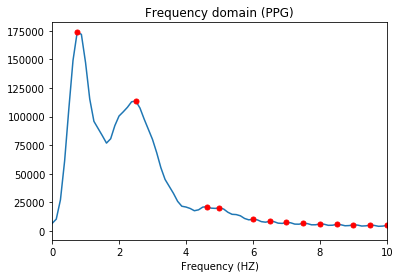

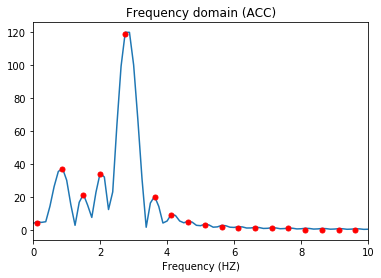

In [110]:
ground_truth = sp.io.loadmat(ref_fl)['BPM0']
ground_truth.shape

#for i in range (int(np.trunc(len(fft_ppg)/(fs*2)))):
for i in range (1):
    print (i)
    ppg_slice = fft_ppg[i*fs*2:(i+1)*fs*2]
    # Pass only the 40 HZ to 240 HZ band
    bandpassed_slice = LowpassFilter(ppg_slice, (0.67, 4)) 
    #print(len(bandpassed_slice))
    
    # Transform to frequency domain
    freqs_slice = np.fft.rfftfreq(len(bandpassed_slice)*4, 1/fs)
    fft_slice = np.abs(np.fft.rfft(bandpassed_slice, len(bandpassed_slice)*4))

    # Find Peak
    ppg_pks = sp.signal.find_peaks(fft_slice)[0]
    ppg_freqs_pks = np.ones(len(ppg_pks))
    
    print ("Signal Freq",freqs_slice)
    print ("Signal Mag", fft_slice[ppg_pks])
    print ("Signal Peaks (Index to Mag)", ppg_pks)
    
    for i in range(len(ppg_pks)):
        ppg_freqs_pks[i] = freqs_slice[ppg_pks[i]]
        ppg_pks[i] = fft_slice[ppg_pks[i]]
    print ("Peak Frequencies", ppg_freqs_pks, len(freqs))
    print ("Peak Magnitudes", ppg_pks)
    
    peakval = np.max(ppg_pks)
    print ("Highest Peak =", peakval)
    print ("Highest Peak Frequency =", ppg_freqs_pks[np.where(ppg_pks == peakval)[0][0]])
    
    plt.figure(i)
    plt.title('Frequency domain (PPG)')
    plt.xlabel('Frequency (HZ)')
    plt.xlim (0, 10)
    plt.plot(freqs_slice, fft_slice)
    plt.plot(ppg_freqs_pks, ppg_pks,"r.",ms=10)
    
    # ACC_MAG
    print (i)
    acc_slice = acc_mag[i*fs*2:(i+1)*fs*2]
    # Pass only the 40 HZ to 240 HZ band
    bandpassed_slice = LowpassFilter(acc_slice, (0.67, 4)) 
    #print(len(bandpassed_slice))
    
    # Transform to frequency domain
    # Multiply length by 4 to maintain the frequency granularity. Else
    # accuracy drops and comparison withe ACC frequencies become meaningless
    freqs_slice = np.fft.rfftfreq(len(bandpassed_slice)*4, 1/fs)
    fft_slice = np.abs(np.fft.rfft(bandpassed_slice, len(bandpassed_slice)*4))

    # Find Peak
    acc_pks = sp.signal.find_peaks(fft_slice)[0]
    acc_freqs_pks = np.ones(len(acc_pks))
    
    print ("ACC Signal Frequencies =", freqs_slice)
    print ("ACC Signal Magnitudes=", fft_slice[acc_pks])
    print ("ACC Peaks (Indices) =", acc_pks,"# of peaks =", len(acc_pks))
  
    for i in range(len(acc_pks)):
        acc_freqs_pks[i] = freqs_slice[acc_pks[i]]
        acc_pks[i] = fft_slice[acc_pks[i]]
    
    # Sort frequency peaks from Accelerometer Magnitude slices
    # acc_freqs_pks = np.sort(acc_freqs_pks)
    
    print ("ACC Peaks (Frequencies)=",acc_freqs_pks)
    print ("ACC Peaks (Magnitudes) =",acc_pks)
    peakval = np.max(acc_pks)
    print ("Highest Peak =", peakval)
    print ("Highest Peak Frequency =", acc_freqs_pks[np.where(acc_pks == peakval)[0][0]])
    
    plt.figure(i+1)
    plt.title('Frequency domain (ACC)')
    plt.xlabel('Frequency (HZ)')
    plt.xlim (0, 10)
    plt.plot(freqs_slice, fft_slice)
    plt.plot(acc_freqs_pks, acc_pks,"r.",ms=10)
   
    # The ground truth for this slice
    
    ground_truth_slice = ground_truth[i]
    ground_truth_slice = ground_truth_slice[0]/60
    print ("Ground Truth = ", ground_truth_slice)
    

Text(0.5,0,'Time (sec)')

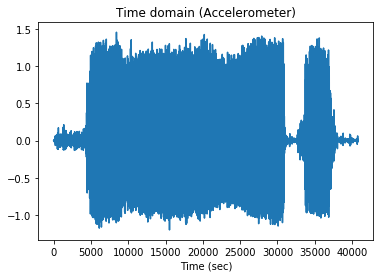

In [111]:
#pks=sp.signal.find_peaks(acc_mag, height=1, distance=15)[0]
        
plt.clf()
plt.figure(0)
plt.title('Time domain (Accelerometer)')
plt.plot(acc_mag)
plt.xlabel('Time (sec)')

#plt.plot(pks, acc_mag[pks],"r.",ms=10)

In [112]:
# Note that the mean of the dominant BPMs that we get in the frequency domain after band pass filtering (149) is close 
# to what we got in the time domain earlier with basic 'find_peaks filtering' for height/width (155). So we 
# are on the right track

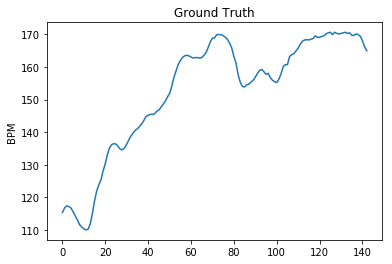

In [70]:
plt.figure(1)
plt.title('Ground Truth')
plt.ylabel('BPM')
#plt.xlim (0, 4)
plt.plot(ground_truth)

-----
### Project Write-up

Answer the following prompts to demonstrate understanding of the algorithm you wrote for this specific context.

> - **Code Description** - Include details so someone unfamiliar with your project will know how to run your code and use your algorithm. 
> - **Data Description** - Describe the dataset that was used to train and test the algorithm. Include its short-comings and what data would be required to build a more complete dataset.
> - **Algorithhm Description** will include the following:
>   - how the algorithm works
>   - the specific aspects of the physiology that it takes advantage of
>   - a describtion of the algorithm outputs
>   - caveats on algorithm outputs 
>   - common failure modes
> - **Algorithm Performance** - Detail how performance was computed (eg. using cross-validation or train-test split) and what metrics were optimized for. Include error metrics that would be relevant to users of your algorithm. Caveat your performance numbers by acknowledging how generalizable they may or may not be on different datasets.

Your write-up goes here...

-----
### Next Steps
You will now go to **Test Your Algorithm** to apply a unit test to confirm that your algorithm met the success criteria. 